# Super Data Science Community Project #26
Retail Pulse: Customer Journey Prediction & Marketing Impact Analysis!!!


### Quick Summary of the dataset
TechCorner Mobile Sales & Customer Insights is a real-world dataset capturing 10 months of mobile phone sales transactions from a retail shop in Bangladesh. This dataset was designed to analyze customer location, buying behavior, and the impact of Facebook marketing efforts.

The primary goal was to identify whether customers are from the local area (Rangamati Sadar, Inside Rangamati) or completely outside Rangamati. Since TechCorner operates a Facebook page, the dataset also includes insights into whether Facebook marketing is effectively reaching potential buyers.

Additionally, the dataset helps in determining:
✔ How many customers are new vs. returning buyers
✔ If customers are followers of the shop’s Facebook page
✔ Whether a customer was recommended by an existing buyer

[Link to Dataset](https://www.kaggle.com/datasets/shohinurpervezshohan/techcorner-mobile-purchase-and-engagement-data)

For versions of the libraries used for this analysis see [requirements.txt](requirements.txt)

In [1]:
## Import the basic data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

### Load the dataset and Examine Characteristics

In [11]:
dataset = pd.read_csv(r'.\data\TechCorner_Sales_update.csv')
dataset.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


Description of the continuous variables of the dataset

In [12]:
dataset.describe()

,Cus.ID,Age,Sell Price
count,8871.000000,8871.000000,8871.00000
mean,4436.000000,34.047007,25068.38654
std,2560.981452,9.592612,18032.80271
min,1.000000,18.000000,12702.00000
25%,2218.500000,26.000000,17466.50000
50%,4436.000000,34.000000,21682.00000
75%,6653.500000,42.000000,25777.50000
max,8871.000000,50.000000,200465.00000


Check basic summary and structure of the dataset

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cus.ID                                8871 non-null   int64  
 1   Date                                  8871 non-null   object 
 2   Cus. Location                         8871 non-null   object 
 3   Age                                   8871 non-null   int64  
 4   Gender                                8871 non-null   object 
 5   Mobile Name                           8871 non-null   object 
 6   Sell Price                            8871 non-null   float64
 7   Does he/she Come from Facebook Page?  8871 non-null   object 
 8   Does he/she Followed Our Page?        8871 non-null   object 
 9   Did he/she buy any mobile before?     8871 non-null   object 
 10  Did he/she hear of our shop before?   8871 non-null   object 
dtypes: float64(1), in

Data set has column 'Date' that will be converted to datatime64 data type for use in anaylsis. Columns with long names will be given shorter names for reference in code.

The description of the dataset indicates that Region Column will be encoded as Local or Non-Local

In [14]:
# rename columns to remove spaces and make them easier to work with
columns_renamed = {
    'Cus. Location': 'Location',
    'Mobile Name': 'Mobile_Name',
    'Sell Price': 'Sell_Price',
    'Does he/she Come from Facebook Page?': 'FromFacebook',
    'Does he/she Followed Our Page?': 'FollowFacebook',
    'Did he/she buy any mobile before?': 'BoughtBefore',
    'Did he/she hear of our shop before?': 'HeardBefore'
}
dataset.rename(columns=columns_renamed, inplace=True)

# drop the Cus.ID column as it is not needed for analysis
dataset.drop(columns=['Cus.ID'], inplace=True)


Convert Date column into a datetime64 

In [15]:
dataset.Date = pd.to_datetime(dataset.Date, dayfirst=True) # Convert the Date column to datetime format
dataset.head()

,Date,Location,Age,Gender,Mobile_Name,Sell_Price,FromFacebook,FollowFacebook,BoughtBefore,HeardBefore
0,2024-05-27,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2024-05-27,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,2024-05-27,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,2024-05-27,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,2024-05-27,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


Set the locations based on the definition of the datset

In [16]:
# unique Locations
dataset.Location.unique()

array(['Rangamati Sadar', 'Inside Rangamati', 'Outside Rangamati'],
      dtype=object)

In [17]:
dataset['Location'] = dataset.Location.apply(
    lambda x: 'Local' if x in ['Rangamati Sadar', 'Inside Rangamati'] else 'Non-Local')
dataset.head()

,Date,Location,Age,Gender,Mobile_Name,Sell_Price,FromFacebook,FollowFacebook,BoughtBefore,HeardBefore
0,2024-05-27,Local,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2024-05-27,Local,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,2024-05-27,Local,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,2024-05-27,Local,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,2024-05-27,Non-Local,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


# Exploratory Data Analysis - EDA

### Distribution of the purchases by location

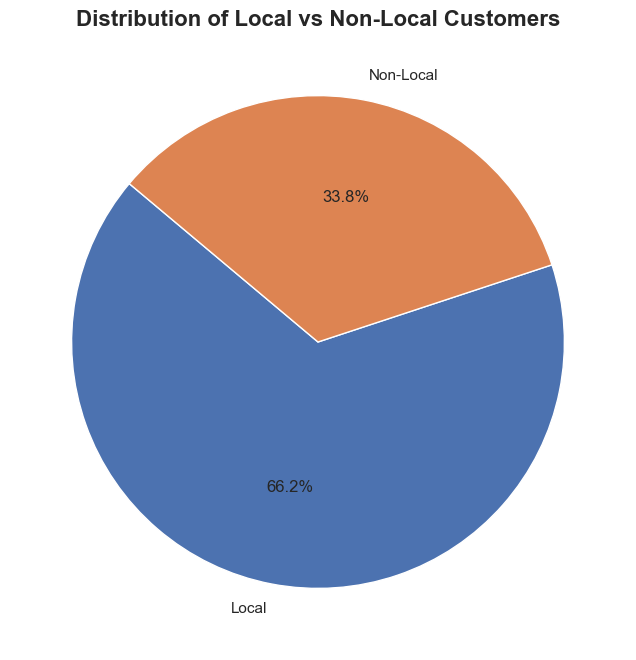

In [18]:
# use a pie chart to show the distribution of Local vs Non-Local customers
plt.figure(figsize=(12,8))
plt.pie(
    dataset.Location.value_counts(), 
    labels=dataset.Location.value_counts().index, 
    autopct='%1.1f%%', 
    startangle=140
    )
plt.title('Distribution of Local vs Non-Local Customers', fontsize=16, fontweight='bold')
plt.show()

The majority of customers 66.2 percent (66.2%) are local customers in the Rangamati region

### Distribution of the Age Demographic

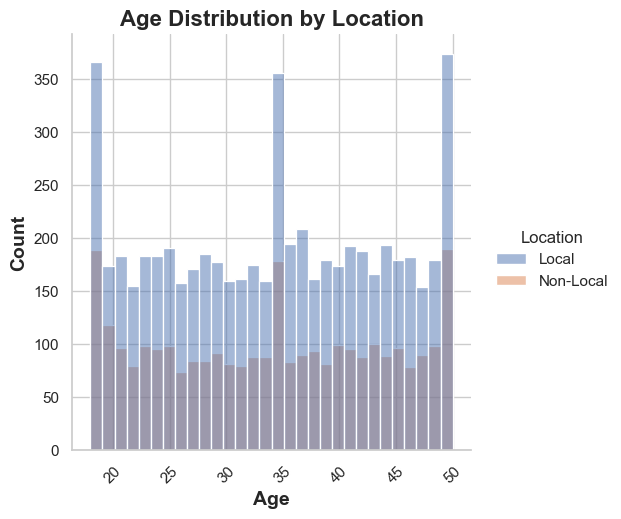

In [19]:

sns.displot(data=dataset, x='Age', bins=30, hue='Location')
plt.title('Age Distribution by Location', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

The data shows three distinct age groups 18, 35, 50yo making majority of purchases by volume. This trend is seen across both Local and Non-Local regions. The distribution of the age groups shows little variation in total purchases for all other ages.

### Customer behaviour pattern
The customer behavious patter will be seen in the listing how customer have responded to Facebook, are new or returning customers.

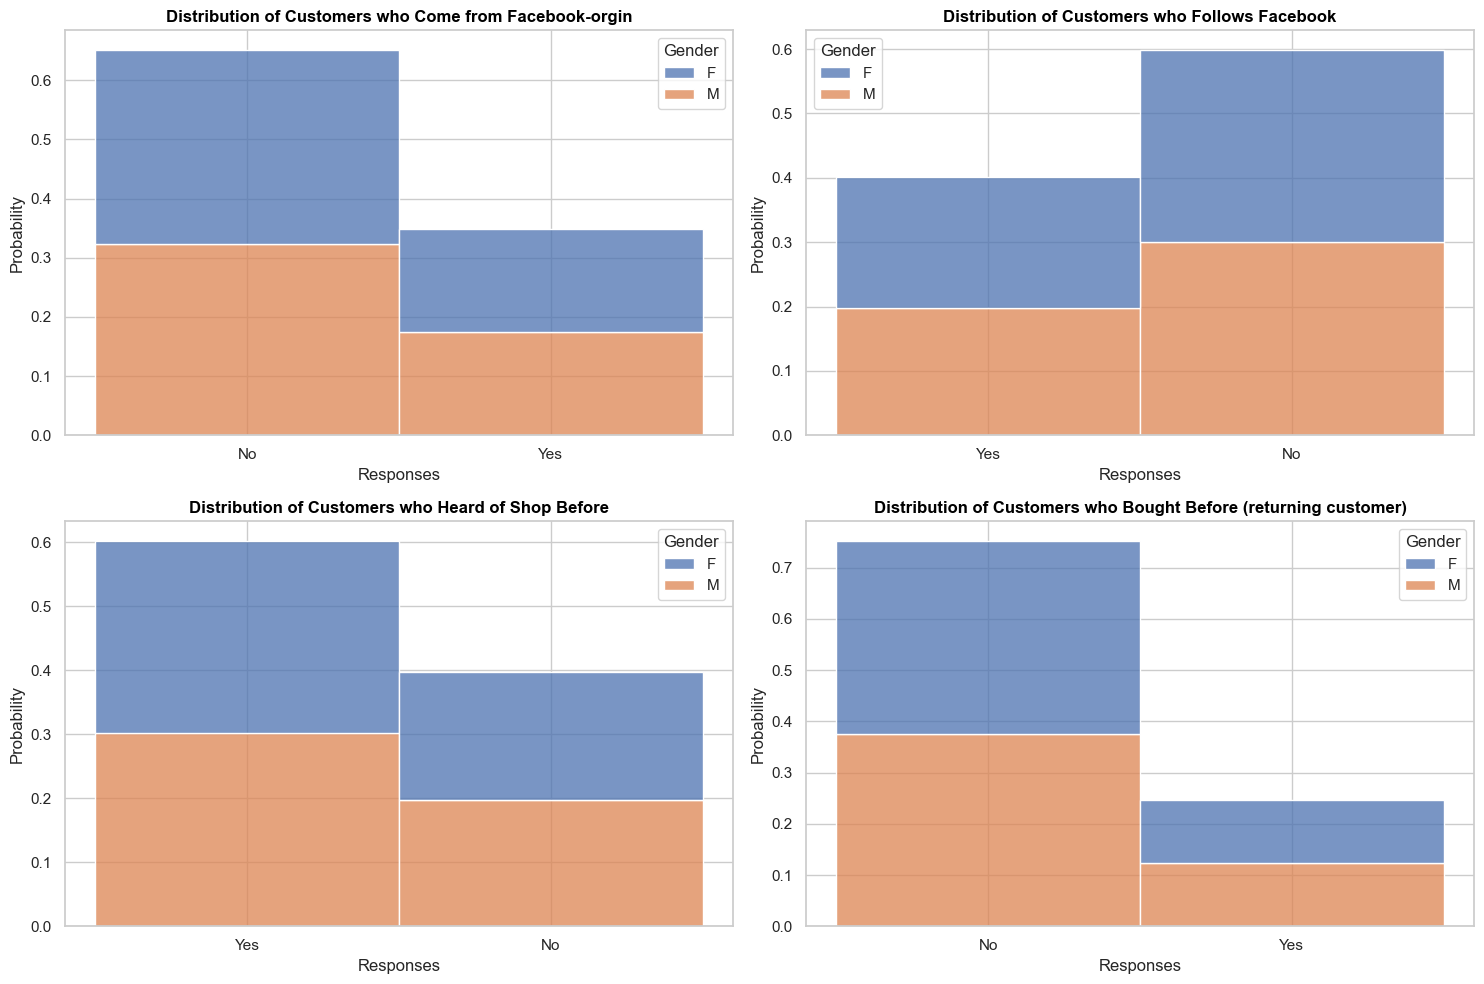

In [21]:
social_media_responses = {
    'FromFacebook' : 'Come from Facebook-orgin',
    'FollowFacebook' : 'Follows Facebook', 
    'HeardBefore' : 'Heard of Shop Before', 
    'BoughtBefore': 'Bought Before (returning customer)'}
plt.figure(figsize=(15,10))
for i , responses in enumerate(list(social_media_responses.keys()), 1):
    plt.subplot(2, 2, i)
    sns.histplot(dataset, x=responses, bins=30, stat='probability', hue='Gender', multiple='stack')
    plt.title(f'Distribution of Customers who {social_media_responses[responses]}', {'fontweight':'bold', 'c': 'black'})
    plt.xlabel('Responses')
    plt.ylabel('Probability')
plt.tight_layout()
plt.show()

The gender demographic of all respondents to the yes/no questions has and even distribution between male and female. From the above, 35% of purchases came through Facebook. 75% of all purchases are from new customers.  

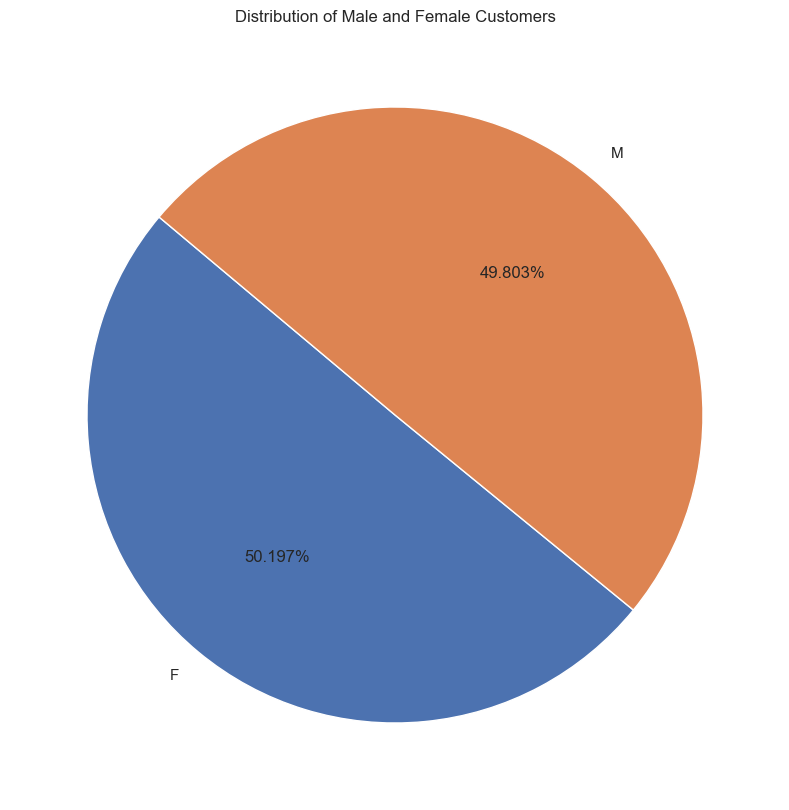

In [22]:
# Plot a pie Chart of overall gender demographic regardless of region and age
plt.figure(figsize=(15,10))
plt.pie(dataset.Gender.value_counts(),
        labels=dataset.Gender.value_counts().index,
        autopct='%1.3f%%',
        startangle=140
        )
plt.title('Distribution of Male and Female Customers')
plt.show()


In [23]:
print(dataset.Gender.value_counts())

Gender
F    4453
M    4418
Name: count, dtype: int64


Proportion of male and female customers is almost equal.

### Analysis of Customer Mobile Brand Preference

The mobile brands purchased by volume 

In [24]:
dataset.Mobile_Name.value_counts()

Mobile_Name
Moto G85 5G 8/128           560
Galaxy S24 Ultra 12/256     541
Note 11S 6/128              538
Pixel 8 Pro 12/256          533
Narzo N53 4/64              530
Redmi Note 12 Pro 8/128     528
Galaxy M35 5G 8/128         528
Galaxy A55 5G 8/128         522
iQOO Z7 5G 6/128            522
iPhone 16 Pro 256GB         521
Vivo Y200 5G 6/128          520
Pixel 7a 8/128              518
Vivo T3x 5G 8/128           514
R-70 Turbo 5G 6/128         511
iQOO Neo 9 Pro 5G 12/256    502
Note 14 Pro 5G 8/256        495
iPhone 16 Pro Max 1TB       488
Name: count, dtype: int64

From the data the most popular model is the Mobile G85 5G 8/128.

### Mobile purchases over time

In [25]:
# prepare columns to group by
dataset['Month'] = dataset.Date.dt.to_period('M') # Extract month from the Date column
dataset['Day'] = dataset.Date.dt.day


Mobile Phone sold by Volume

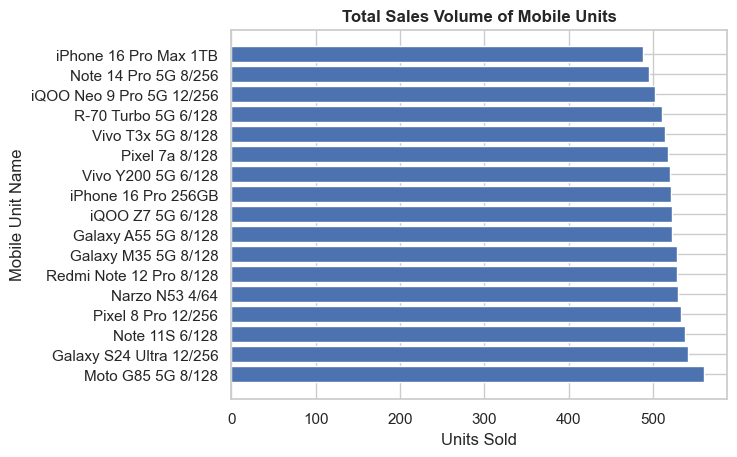

In [26]:
plt.barh(dataset.Mobile_Name.value_counts().index, dataset.Mobile_Name.value_counts().values)
plt.xlabel('Units Sold')
plt.ylabel('Mobile Unit Name')
plt.title('Total Sales Volume of Mobile Units', fontsize=12, fontweight='bold')
plt.show()


Plot the monthly Sales Volume for Mobile Devices and Location

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            8871 non-null   datetime64[ns]
 1   Location        8871 non-null   object        
 2   Age             8871 non-null   int64         
 3   Gender          8871 non-null   object        
 4   Mobile_Name     8871 non-null   object        
 5   Sell_Price      8871 non-null   float64       
 6   FromFacebook    8871 non-null   object        
 7   FollowFacebook  8871 non-null   object        
 8   BoughtBefore    8871 non-null   object        
 9   HeardBefore     8871 non-null   object        
 10  Month           8871 non-null   period[M]     
 11  Day             8871 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7), period[M](1)
memory usage: 797.1+ KB


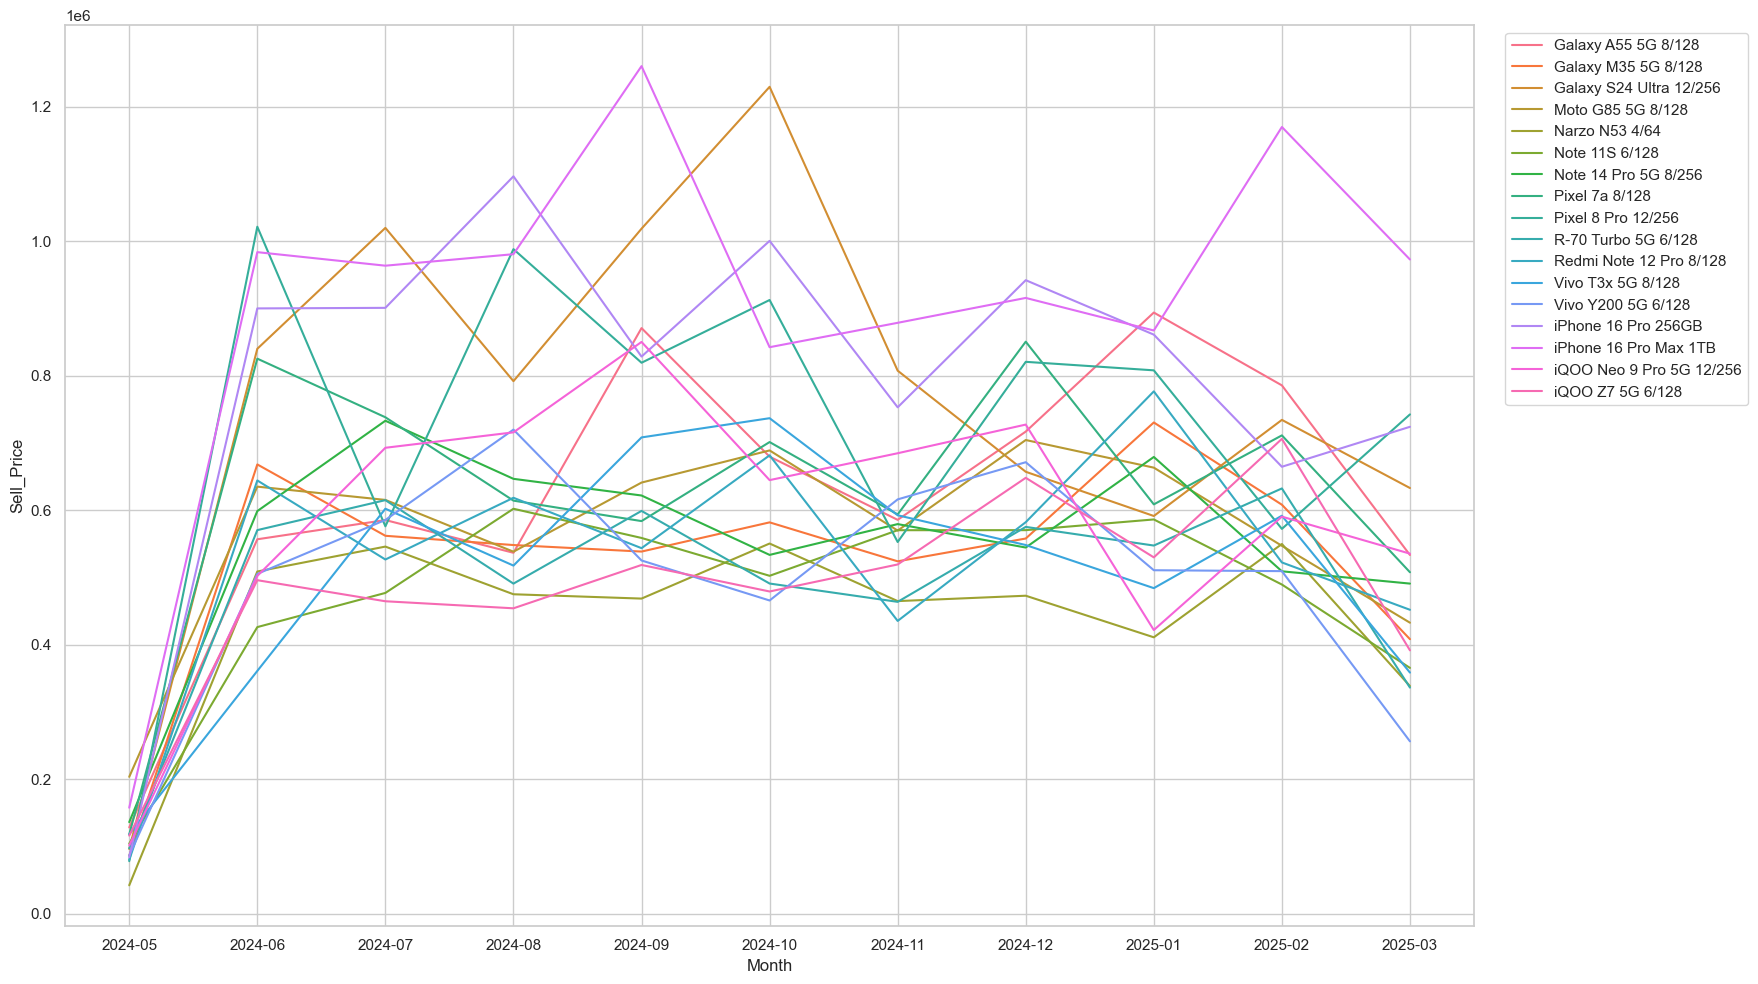

In [28]:
sales_by_mobile = dataset.groupby(['Mobile_Name', 'Month'], as_index=False)
dataset['Month'] = dataset.Month.apply(lambda x: str(x))
sales_month = dataset.groupby(['Month', 'Mobile_Name', 'Location']).agg({'Sell_Price': 'sum'})
sales_month.reset_index()
plt.figure(figsize=(15,10))
sns.lineplot(sales_month, x='Month', y='Sell_Price', hue='Mobile_Name', errorbar=None)
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.0))
plt.show()


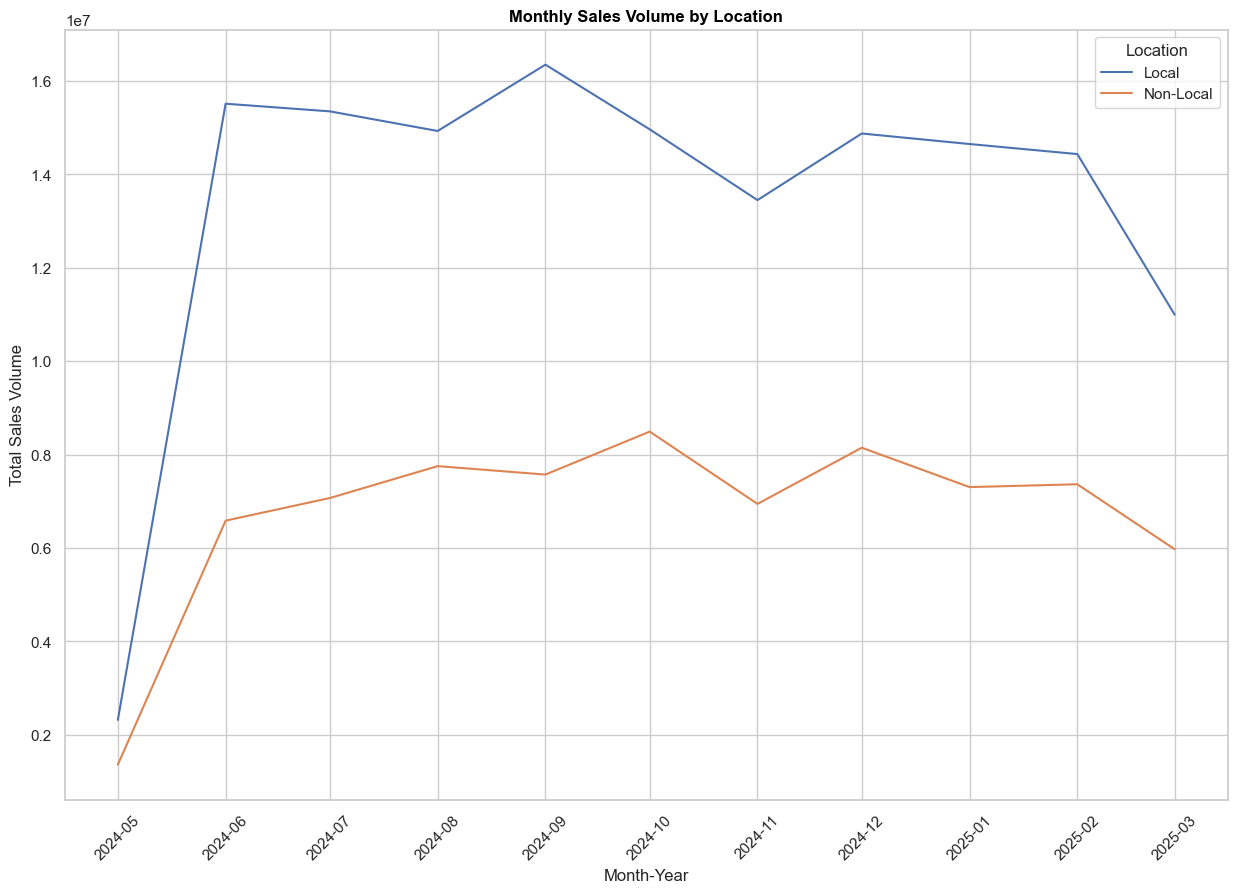

In [29]:
# ***********************************************************
dataset['Month_Year'] = dataset['Date'].dt.to_period('M')
sales_by_month = dataset.groupby(['Month_Year', 'Location']).agg({'Sell_Price': 'sum'}).reset_index()
sales_by_month['Month_Year'] = sales_by_month['Month_Year'].dt.to_timestamp()  # Convert to timestamp for plotting
plt.figure(figsize=(15,10))
sns.lineplot(data=sales_by_month, x='Month_Year', y='Sell_Price', hue='Location')
plt.xlabel('Month-Year')
plt.title('Monthly Sales Volume by Location', {'fontweight':'bold', 'c': 'black'})
plt.xticks(rotation=45)
plt.ylabel('Total Sales Volume')
plt.show()


A quick overview of the monthly Sales trend for individual mobile devices and sales volume by location does not indicate a definate seasonal pattern at this first glance. The sales volume for 2024-05 in both plots shows low total sales volume compared to the average for other months

In [30]:
print(f'Sales volume for 2024-05 : {sales_by_month.Sell_Price[sales_by_month.Month_Year == pd.to_datetime('2024-05')].sum():,.2f}')
print(f'Average Sales for All Months except May 2024 (2024-05): {sales_by_month.Sell_Price[sales_by_month.Month_Year != pd.to_datetime('2024-05')].mean():,.2f}')
print(f'Smallest Date: {dataset.Date.min()}')
print(f'Last date date collected: {dataset.Date.max()}')


Sales volume for 2024-05 : 3,677,909.00
Average Sales for All Months except May 2024 (2024-05): 10,935,187.40
Smallest Date: 2024-05-27 00:00:00
Last date date collected: 2025-03-22 00:00:00


The above indicates that the significantly lower sales volume for 2024-05 is due data collection starting later in the month on May 27<sup>th</sup> 2024. The last date of data collection was March 25<sup>th</sup> 2025. Since there is not a full year of data no discernable seanonal features in the time series is assumed.

In [31]:
sale_days = pd.Series(dataset.Date.dt.to_period('M'))
sale_days = sale_days.apply(lambda x: str(x))
day_counts = sale_days.value_counts().to_frame()
day_counts.sort_index()


,count
Date,
2024-05,153
2024-06,861
2024-07,898
2024-08,912
2024-09,916
2024-10,943
2024-11,838
2024-12,935
2025-01,900


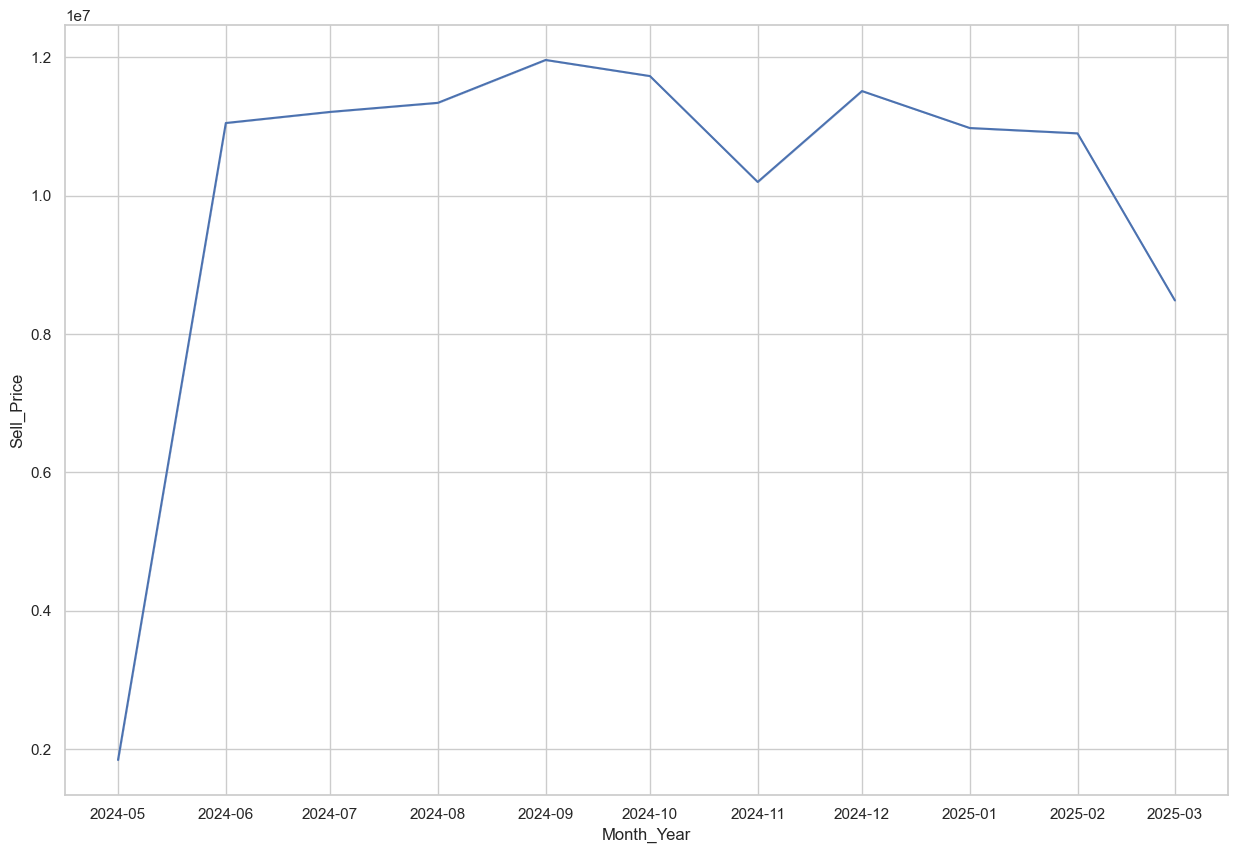

In [32]:
plt.figure(figsize=(15,10))
sns.lineplot(data=sales_by_month, x='Month_Year', y='Sell_Price', errorbar=('ci',False))
plt.show()

In [26]:
import sys
import matplotlib

print('pandas==',pd.__version__)
print('numpy==',np.__version__)
print('matplotlib==',matplotlib.__version__)
print('python==',sys.version)

pandas== 2.2.2
numpy== 1.26.4
matplotlib== 3.8.4
python== 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


# Model Development

Make a copy of the dataset for model training. All feature engineering and data cleaning will be done on this copy.

In [33]:
model_dataset = dataset[['Location', 'Age', 'Gender', 'Mobile_Name', 'Sell_Price',
       'FromFacebook', 'FollowFacebook', 'BoughtBefore',
       'HeardBefore']].copy()

In [34]:
model_dataset.head()

,Location,Age,Gender,Mobile_Name,Sell_Price,FromFacebook,FollowFacebook,BoughtBefore,HeardBefore
0,Local,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,Local,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,Local,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,Local,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,Non-Local,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


Save a copy of the data to be used in the model

In [35]:
model_dataset.to_csv(r'.\data\model_data.csv')

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

leloc = LabelEncoder()
model_dataset['Location'] = leloc.fit_transform(model_dataset['Location'])

In [38]:
model_dataset.head()

,Location,Age,Gender,Mobile_Name,Sell_Price,FromFacebook,FollowFacebook,BoughtBefore,HeardBefore
0,0,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,0,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,0,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,0,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,1,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes
